<p style =  "font-style:italics">Author : Tanya Sethi </p>

This python code-file uses decision-tree classification, a machine-learning method, to classify flowers into three species on based of their attributes. 

<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold">Importing and Cleaning the data </p>

In [1]:
#Importing the directories 
import os
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
#Importing the data from SQL file 
error_message = "Error: sqlite file not available, check instructions above to download it"
assert "database.sqlite" #in data_iris_folder_content, error_message
conn = sqlite3.connect('database.sqlite')
iris_data = pd.read_sql_query("SELECT * FROM Iris", conn)
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Checking the type of data in the columns 
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [4]:
#Describing the data 
df = iris_data 
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#Creating categorical variable for species 
conditions = [
    (df['Species'] == 'Iris-setosa'),
    (df['Species'] == 'Iris-versicolor'),
    (df['Species'] == 'Iris-virginica')
    ]
values = [0, 1, 2]
df['category'] = np.select(conditions, values)
df.head


<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  category  
0       Iris-setosa         0  
1       Iris-setosa         0  
2       Iris-setosa         0  
3

<br> <p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold"> Data Visualisation </p> <br> 

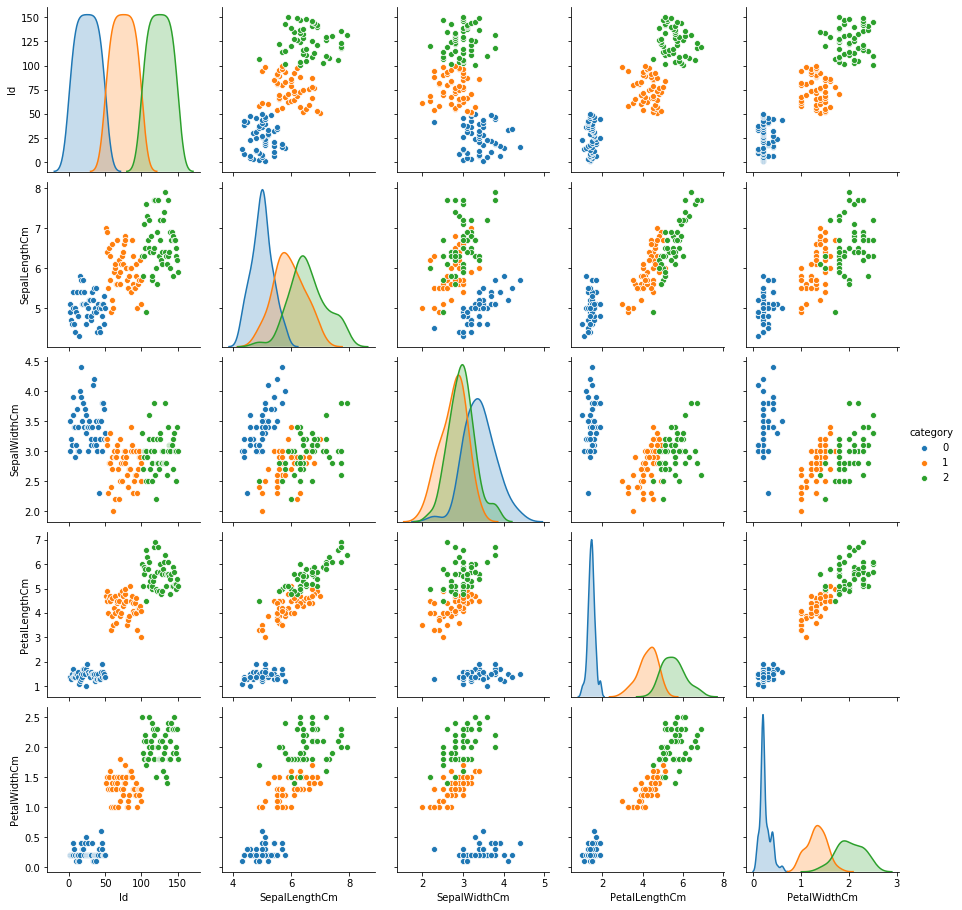

In [6]:
#Visualising the Data 
sns.pairplot(df, hue='category')

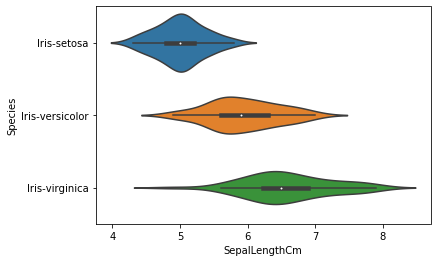

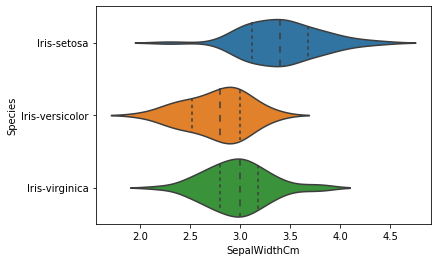

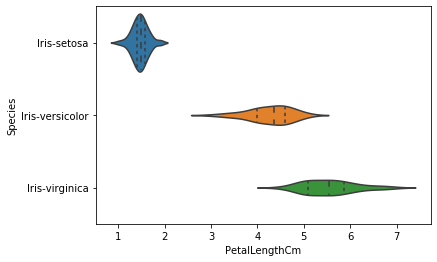

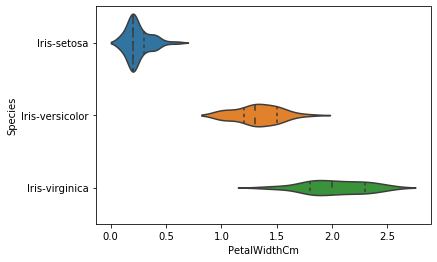

In [7]:
#Comparison of species across attributes 
g = sns.violinplot(y='Species', x='SepalLengthCm', data=df)
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

<br><p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold">Implementing the decision-tree classification </p>

In [8]:
#Creating a dataset Y with dependent columns 
y = df[['category']].copy()
y.head()

,category
0,0
1,0
2,0
3,0
4,0


In [9]:
#Creating a dataset X with independent columns
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].copy()
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
#Splitting the data into training and testing groups 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 390)

In [11]:
#Applying the classifier and reporting accurancy 
species_classifier = DecisionTreeClassifier(max_leaf_nodes = 8, random_state = 20)
species_classifier.fit(X_train, y_train)
predictions = species_classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.98

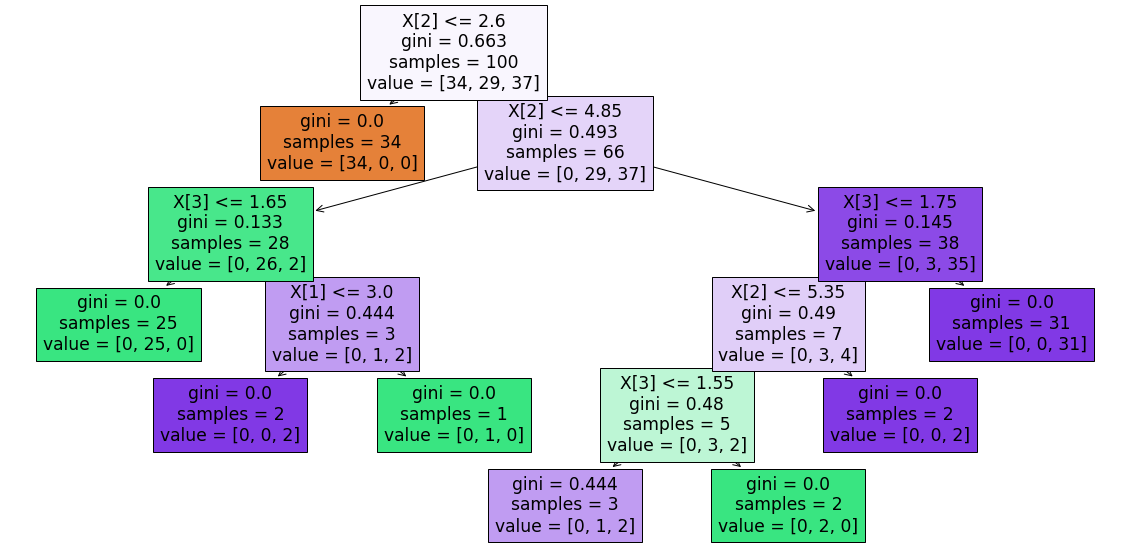

In [12]:
#Plotting the classifier with Gini Index 
plt.figure(figsize = (20,10))
plot_tree(species_classifier, 
          filled=True      )
plt.show()